# IMPORT NECESSARY PACKAGES


In [1]:
import time
import os
import numpy as np
import glob
import ntpath
import os
from numpy import asarray
import sklearn
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn import tree
import pickle
from sklearn.model_selection import cross_val_score


# PREPARE TRAINING DATASET


In [2]:
# Load data

sample_training_data = np.load('Training data/sample_training_data_natural.npz')
data = sample_training_data['data']
labels = sample_training_data['label']
data.shape
X=np.array(data)
print (type(labels))


<class 'numpy.ndarray'>


# Spilit the data into Training set and Testing Set


In [3]:
# create dataset
#X, y = make_blobs(n_samples=1000)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.15)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(192, 10) (35, 10) (192,) (35,)


# Apply SVM

In [4]:

model=svm.SVC(kernel='rbf',decision_function_shape='ovo', gamma=1.5, C=1)  # 65.51
#model=svm.SVC(kernel='poly', degree=3, gamma='auto', C=1)
model.fit(X_train, y_train)
trs=model.score(X_train,y_train)
tds=model.score(X_test,y_test)
print("Score on training data: ",trs)
print("Score on test data: ",tds)
scores = cross_val_score(model, X, labels, cv=20)
print("Cross Fold Validation Scores: ",scores)

Score on training data:  0.6927083333333334
Score on test data:  0.5142857142857142
Cross Fold Validation Scores:  [0.76923077 0.53846154 0.76923077 0.41666667 0.91666667 0.5
 0.58333333 0.83333333 0.58333333 0.66666667 0.63636364 0.63636364
 0.36363636 0.72727273 0.6        0.7        0.6        0.6
 0.3        0.6       ]


# Apply Random Forest


In [5]:

clf = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10,oob_score=bool, warm_start=bool,random_state=42)
clf.fit(X_train, y_train)
trs=clf.score(X_train,y_train)
tds=clf.score(X_test,y_test)
print("Score on training data: ",trs)
print("Score on test data: ",tds)
scores = cross_val_score(clf, X, labels, cv=20)
print("Cross Fold Validation Scores: ",scores)


Score on training data:  0.984375
Score on test data:  0.6857142857142857
Cross Fold Validation Scores:  [0.76923077 0.53846154 0.61538462 0.75       0.83333333 0.41666667
 0.58333333 0.66666667 0.75       0.75       0.81818182 0.54545455
 0.63636364 0.54545455 0.4        0.8        0.5        1.
 0.9        0.6       ]


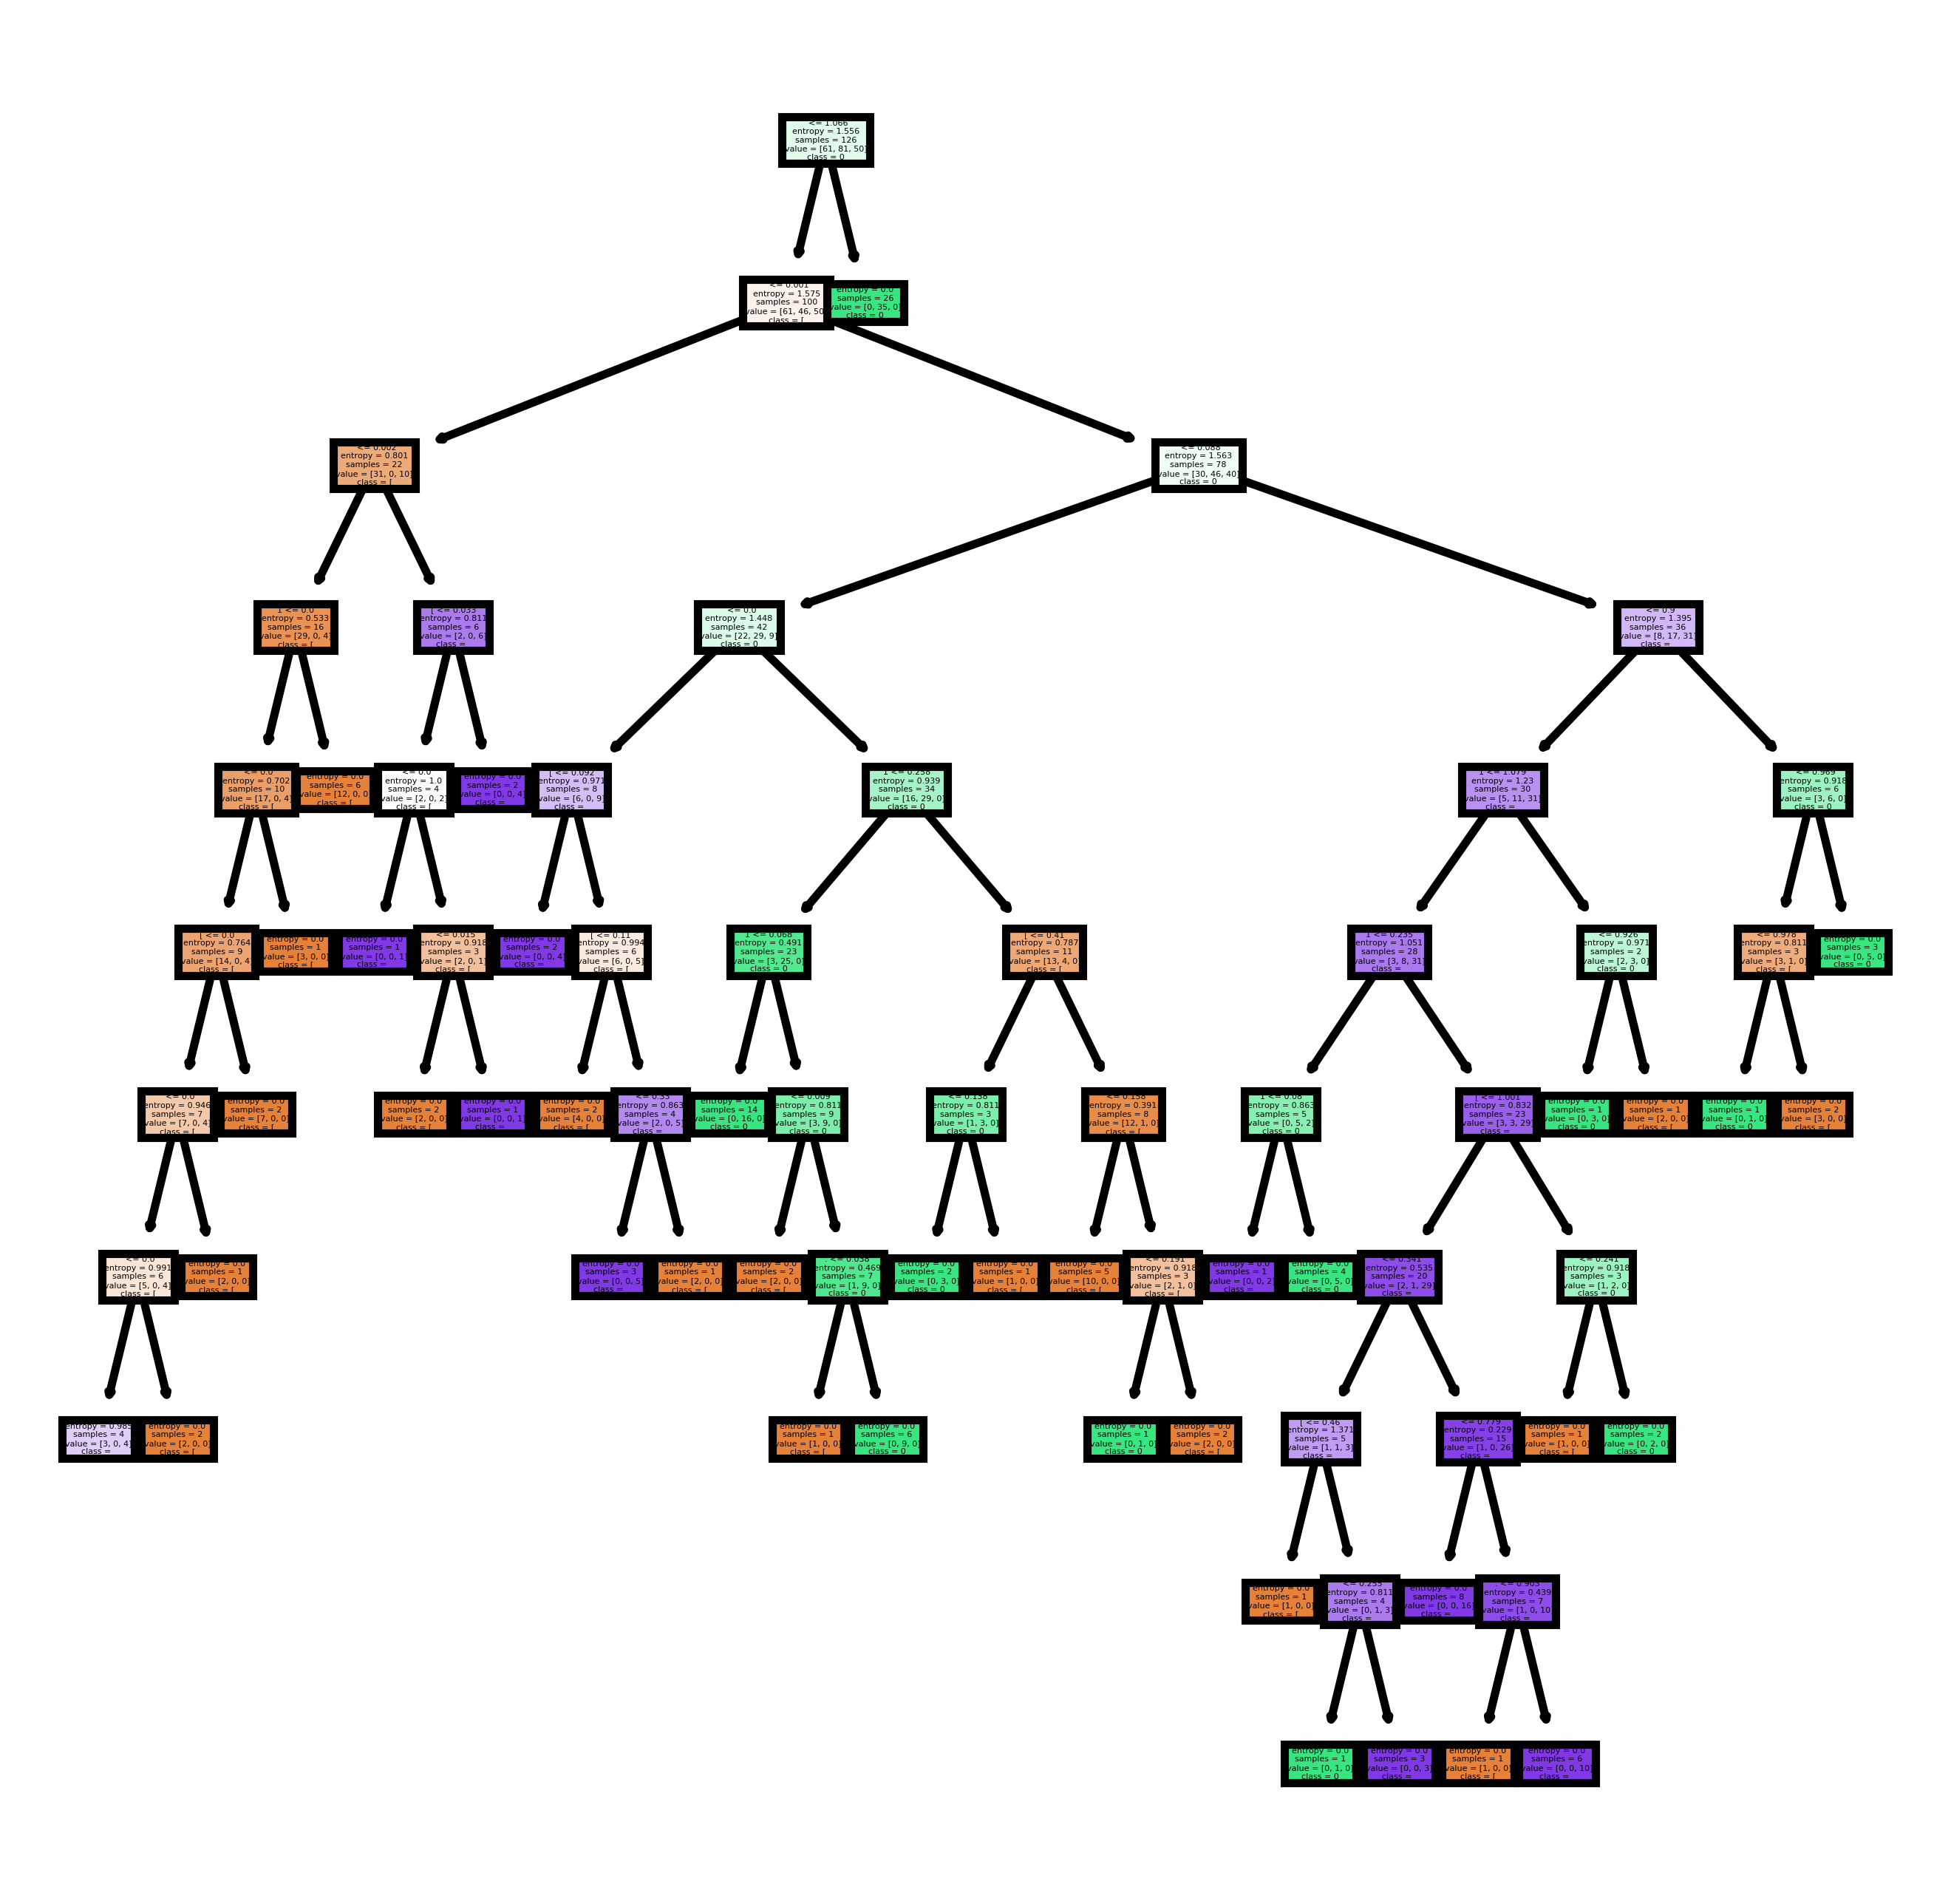

In [6]:
#VISUALING THE RANDOM FOREST

fn=str(data)
cn=str(labels)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree_naturalhold.png')

In [7]:
# Save the Modle to file in the current working directory

Pkl_Filename = "saved models/Naturalhold_Modell.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf, file)
#print(predictions)
#print(predictions1)